<h2> Import and Install Dependencies<h2/>

In [2]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-02-13 13:46:09.878288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h2>2. Keypoints using MP Holistic</h2>

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converter para RGB (para usar mediapipe, tem de estar em rgb)
    image.flags.writeable = False # otimiza o processo
    results = model.process(image) # model(holistic).process devolve as landmarks da imagem (pontos da pose, cara e mãos)
    return results 

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(0,165,255), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(92,197,255), thickness=1, circle_radius=1)
                             )
    # Draw pose conections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,165,255), thickness=2, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(92,197,255), thickness=2, circle_radius=1)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,165,255), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(92,197,255), thickness=1, circle_radius=1)
                             ) 
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,165,255), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(92,197,255), thickness=1, circle_radius=1)
                             ) 

In [31]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        # Read feed
        ret, frame = cap.read() # ret é True se a frame for capturada com sucesso
    
        # Make detections
        results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(frame, results)
        
        # Show to screen
        cv2.imshow('Cara Laroca', frame)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

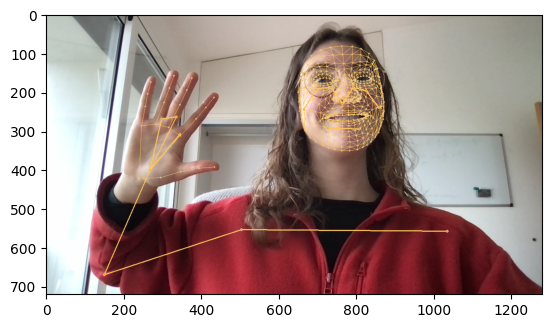

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values

In [37]:
results.face_landmarks

landmark {
  x: 0.5636613368988037
  y: 0.445618212223053
  z: -0.040068406611680984
}
landmark {
  x: 0.5645336508750916
  y: 0.39446720480918884
  z: -0.04052620753645897
}
landmark {
  x: 0.5624583959579468
  y: 0.4225805401802063
  z: -0.030651148408651352
}
landmark {
  x: 0.5538491010665894
  y: 0.36842411756515503
  z: -0.018214398995041847
}
landmark {
  x: 0.5640330910682678
  y: 0.38142940402030945
  z: -0.03892049565911293
}
landmark {
  x: 0.5622584223747253
  y: 0.3714308738708496
  z: -0.030670851469039917
}
landmark {
  x: 0.557115375995636
  y: 0.3543974459171295
  z: 0.004293111152946949
}
landmark {
  x: 0.4996016025543213
  y: 0.37708908319473267
  z: 0.023379473015666008
}
landmark {
  x: 0.5547623038291931
  y: 0.33599889278411865
  z: 0.02084050513803959
}
landmark {
  x: 0.5541051626205444
  y: 0.3209577798843384
  z: 0.02683468908071518
}
landmark {
  x: 0.5501265525817871
  y: 0.2768389582633972
  z: 0.0600137859582901
}
landmark {
  x: 0.5637401938438416
  y: 

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [38]:
extract_keypoints(results)

array([ 0.55867279,  0.42126703, -0.92083567, ...,  0.        ,
        0.        ,  0.        ])

## 4. Setup Folders for Collection

In [34]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Signs that er try to detect 
signs = np.array(['ola', 'obrigado', 'iloveyou'])

# Thirty videos worth of data
no_videos = 30

# Videos are going to be 30 frames in length
frames_per_video = 30

In [35]:
for sign in signs:
    for video in range(no_videos):
        try:
            os.makedirs(os.path.join(DATA_PATH, sign, str(video)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [32]:
def train_sign(sign):
    cv2.waitKey(2000)
    cap = cv2.VideoCapture(0)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        # Loop through videos
        for video in range(no_videos):
            # Loop through video length
            for frame_num in range(frames_per_video):
    
                # Read feed
                ret, frame = cap.read()
            
                # Make detections
                results = mediapipe_detection(frame, holistic)
                print(results)
        
                # Draw landmarks
                draw_styled_landmarks(frame, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(frame, 'NOVO VIDEO', (200,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(frame, '{} - {}'.format(sign,video), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Cara Laroca', frame)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(frame, '{} - {}'.format(sign,video), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Cara Laroca', frame)

                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, sign, str(video), str(frame_num))
                np.save(npy_path, keypoints)
    
                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            else:
                continue
            break
            
        cap.release()
        cv2.destroyAllWindows()
        cv2.waitKey(1)

In [38]:
train_sign('iloveyou')

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

## 6. Preprocess Data and Create Labels and Features

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label: num for num, label in enumerate(signs)}

In [26]:
label_map

{'ola': 0, 'obrigado': 1, 'iloveyou': 2}

In [39]:
all_keypoints, labels = [], []
for sign in signs:
    for video in range(no_videos):
        video_keypoints = []
        for frame_num in range(frames_per_video):
            frame_keypoints = np.load(os.path.join(DATA_PATH, sign, str(video), "{}.npy".format(frame_num)))
            video_keypoints.append(frame_keypoints)
        all_keypoints.append(video_keypoints)
        labels.append(label_map[sign])

In [40]:
np.array(all_keypoints)

array([[[ 0.48148459,  0.3873837 , -0.88016111, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50989354,  0.41217455, -0.45643172, ...,  0.25328642,
          0.43414882, -0.01033999],
        [ 0.51522249,  0.41849786, -0.41232562, ...,  0.25277299,
          0.42687434, -0.01336163],
        ...,
        [ 0.51315939,  0.42565387, -0.41592461, ...,  0.25219396,
          0.43230495, -0.0167344 ],
        [ 0.51299918,  0.42614257, -0.41801986, ...,  0.24786136,
          0.43322608, -0.01909646],
        [ 0.51244521,  0.42639571, -0.4235824 , ...,  0.25311783,
          0.43281984, -0.01923549]],

       [[ 0.51211292,  0.42642185, -0.42618543, ...,  0.24865261,
          0.43263328, -0.01994371],
        [ 0.51213014,  0.47373208, -0.67083883, ...,  0.48080122,
          0.50605279, -0.05053535],
        [ 0.51058054,  0.46797821, -0.62409061, ...,  0.48226306,
          0.54011124, -0.04965895],
        ...,
        [ 0.50814259,  0.42489788, -0.4406628 , ...,  

In [41]:
X = np.array(all_keypoints)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## 7. Build and Train LSTM Neural Network

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [47]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(signs.shape[0], activation='softmax'))

In [48]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 94ms/step - loss: 1.1506 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.6707 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 0s 96ms/step - loss: 11.4544 - categorical_accuracy: 0.4000
Epoch 4/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.4293 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.1707 - categorical_accuracy: 0.3176
Epoch 6/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1145 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1079 - categorical_accuracy: 0.3294
Epoch 8/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0991 - categorical_accuracy: 0.4353
Epoch 9/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0975 - categorical_accuracy: 0.329

KeyboardInterrupt: 

## 8. Make Predictions

In [52]:
signs_predicted = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [53]:
signs[np.argmax(res[1])]

'obrigado'

In [54]:
signs[np.argmax(y_test[1])]

'obrigado'

## 9. Save Weights

In [55]:
model.save('sign.h5')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
del model

In [47]:
model.load_weights('sign.h5')

## 10. Evaluation using Confusion Matrix and Accuracy

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [58]:
y_predicted = model.predict(X_train)

3/3 [==============================] - 0s 31ms/step


In [59]:
y_true = np.argmax(y_train, axis=1).tolist()
y_predicted = np.argmax(y_predicted, axis=1).tolist()

In [62]:
multilabel_confusion_matrix(y_true,y_predicted)

array([[[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 0, 28]],

       [[56,  0],
        [ 0, 29]]])

In [63]:
accuracy_score(y_true,y_predicted)

1.0

## 11. Test in Real Time

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_vis(res, signs, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, signs[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
keypoints_sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        # Read feed
        ret, frame = cap.read()
    
        # Make detections
        results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(frame, results)

        # 2. Prediction Logic
        keypoints = extract_keypoints(results)
        keypoints_sequence.append(keypoints)
        keypoints_sequence = keypoints_sequence[-30:]

        prediction = model.predict(np.expand_dims(keypoints_sequence, axis=0))[0]
        sign = signs[np.argmax(prediction)]

        cv2.rectangle(frame, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(frame, sign, (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        frame = prob_vis(prediction, signs, frame, colors)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', frame)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

1/1 [==============================] - 0s 31ms/step


In [61]:
model.predict(X_test)

1/1 [==============================] - 0s 183ms/step


array([[9.7387761e-05, 9.9974126e-01, 1.6140752e-04],
       [9.9959606e-01, 4.0395727e-04, 4.9974433e-09],
       [9.9999964e-01, 3.9449429e-07, 2.7581951e-13],
       [1.3095967e-13, 2.1539867e-08, 1.0000000e+00],
       [4.5963462e-21, 3.0097276e-13, 1.0000000e+00]], dtype=float32)